In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats as st
import math


In [3]:
def confidence_interval(data):
    s= np.std(data)
    m= np.mean(data)
    n= len(data)
    se= s/math.sqrt(n)
    return st.t.ppf(0.95/2+0.5, df=n-1)*se

In [4]:
bar_heights=np.array(df.apply(np.mean, 1))
bar_error=df.apply(confidence_interval, 1)


<IPython.core.display.Javascript object>


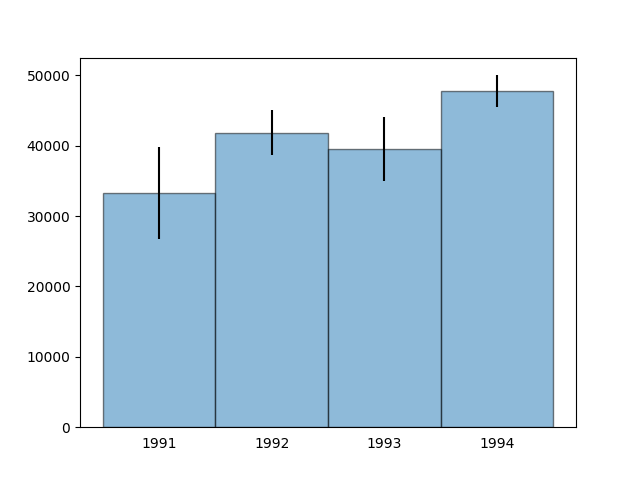

<Container object of 4 artists>

In [5]:
plt.figure()
plt.bar([1991, 1992, 1993, 1994], bar_heights,  width=1, alpha=0.5, edgecolor="black", yerr=bar_error )


In [6]:
import matplotlib.ticker as ticker

plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1991, 1992, 1993, 1994]))
plt.tick_params(axis='x', which='both', bottom=False)
bar_chart=plt

In [7]:
def find_prob(data, y_val):
    se=st.sem(data)
    mean= np.mean(data)
    margin= y_val-mean
    #How many SD away from the mean is the y value?
    z= margin/se
    n=len(data)
    prob=st.t.cdf(z, df=n-1)
    return 1-prob

def set_y(y_val):
    plt.axhline(y=y_val, color='y', linestyle='-', label=str(y_val))
    plt.text(1990, y_val, '{:05.0f}'.format(y_val), backgroundcolor="y")
    return df.apply(find_prob, args=[y_val], axis=1)

<IPython.core.display.Javascript object>


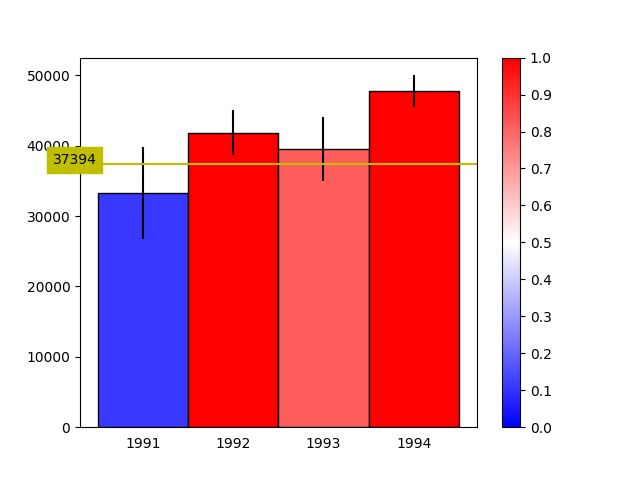

In [8]:
import matplotlib as mpl
plt.figure()
my_cmap = plt.get_cmap("bwr", 256)
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0,1,11))

In [9]:
import matplotlib.ticker as ticker

def chart(y_val):

    plt.bar([1991, 1992, 1993, 1994], 
            bar_heights, 
            width=1, 
            alpha=1, 
            edgecolor="black", 
            yerr=bar_error, 
            color=my_cmap(set_y(y_val)))

    plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1991, 1992, 1993, 1994]))
    plt.tick_params(axis='x', which='both', bottom=False)
chart(30000)

In [10]:
def onclick(event):
    plt.cla()
    chart(event.ydata)
    

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

In [11]:
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7